# Data Understanding

In [ ]:
#Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Defining of data's path
image_path = '/content/drive/MyDrive/Kaggle/Flicker8k_Dataset/'
token_path = '/content/drive/MyDrive/Kaggle/Flickr8k.token.txt'

In [ ]:
#Read txt file
tokens = open(token_path,'r').read()
captions=tokens.splitlines()
len(captions)

40460

In [ ]:
#Read jpg file
import os
from os import listdir

jpgs = os.listdir(image_path)
print("The number of jpg flies in Flicker8k: {}".format(len(jpgs)))

The number of jpg flies in Flicker8k: 8091


In [ ]:
print(captions[:5])
print(jpgs[:5])

['1000268201_693b08cb0e.jpg#0\tA child in a pink dress is climbing up a set of stairs in an entry way .', '1000268201_693b08cb0e.jpg#1\tA girl going into a wooden building .', '1000268201_693b08cb0e.jpg#2\tA little girl climbing into a wooden playhouse .', '1000268201_693b08cb0e.jpg#3\tA little girl climbing the stairs to her playhouse .', '1000268201_693b08cb0e.jpg#4\tA little girl in a pink dress going into a wooden cabin .']
['367964525_b1528ac6e4.jpg', '3264464625_c711cc40c6.jpg', '504765160_b4b083b293.jpg', '2474092890_6c0781a8ed.jpg', '3241965735_8742782a70.jpg']


# Image Feature Extraction

In [ ]:
#Length of Images
from glob import glob
images = glob(image_path+'*.jpg')
len(images)

8091

Image shape of the image is (332, 500, 3) 
Image shape of the image is (296, 500, 3) 
Image shape of the image is (313, 500, 3) 


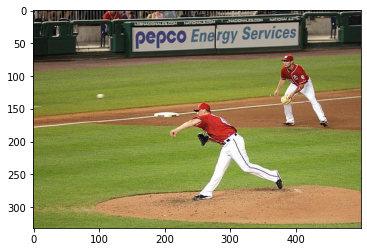

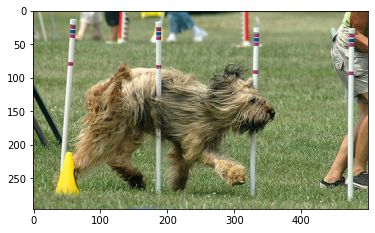

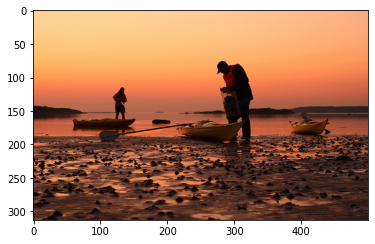

In [ ]:
#Plot random images from dataset
import cv2
from glob import glob
import matplotlib.pyplot as plt

images = glob(image_path+'*.jpg')

for i in range(22,25):
    plt.figure()
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    print("Image shape of the image is {} ".format(img.shape))

In [ ]:
#Model libraries
from keras.applications.vgg16 import VGG16 
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from collections import OrderedDict

import numpy as np
from os import listdir,path

In [ ]:
#Definition of the model
incept_model = VGG16(include_top=True,weights="imagenet")
#Removing of last 2 layer
last = incept_model.layers[-2].output
#Define model without last 2 layer
model = Model(inputs = incept_model.input,outputs = last)
#Summarize the model
model.summary()

553476096/553467096 [==============================] - 14s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
___________________________________________________________

In [ ]:
def extract_features(directory):
  # Empty dictionary to assign features into 
	features = dict()
 # extract features from each photo
	for name in listdir(directory):
		# load an image from file
		filename = directory + '/' + name
		image = load_img(filename, target_size=(224, 224))
		# convert the image pixels to a numpy array
		image = img_to_array(image)
		# reshape data for the model
		image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
		# prepare the image for the VGG model
		image = preprocess_input(image)
		# get features
		feature = model.predict(image, verbose=0)
		# get image id
		image_id = name.split('.')[0]
		# store feature
		features[image_id] = feature
		print('>%s' % name)
	return features



In [ ]:
directory='/content/drive/My Drive/image_captioning/Flicker8k_Dataset'
features = extract_features(directory)
print(len(features))
#Save the features into a file
dump(features,open('/content/drive/My Drive/image_captioning/features.pkl','wb'))

#Captions Pre-Processing

In [ ]:
desc={}
for line in captions:
  alist=line.split("#")
  if len(line)<2:
      continue
  image_id=alist[0].split(".")[0]
  
  if image_id not in desc:
    desc[image_id]=[alist[1][2:]] 
  else:
    desc[image_id].append(alist[1][2:])


In [ ]:
#Read the description data 
with open('/content/drive/MyDrive/Kaggle/Flickr8k.token.txt') as f:
    lines = f.read()

In [ ]:
def desc_load(doc):

  adict = dict()

  lines = doc.split("\n")

  for i in lines:

    tokens = i.split()

    if len(i)<2:

      continue

    img_id= tokens[0].split(".")[0]
    img_desc = tokens[1:]
    img_desc =" ".join(img_desc)

    if img_id not in adict:

      adict[img_id] = list()

    adict[img_id].append(img_desc)

  return adict

# parse descriptions
descriptions = desc_load(lines)
print('Loaded: %d ' % len(descriptions))




Loaded: 8092 


In [ ]:
# displaying an image and captions given to it
temp = captions[5].split("#")
from IPython.display import Image, display
z = Image(filename=image_path+temp[0])
display(z)

for ix in range(len(desc[temp[0]])):
    print(desc[temp[0]][ix])

In [ ]:
import string
from string import punctuation
import re
from nltk import FreqDist
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The size of vocabulary is 9630
Vocabulary size is 9630


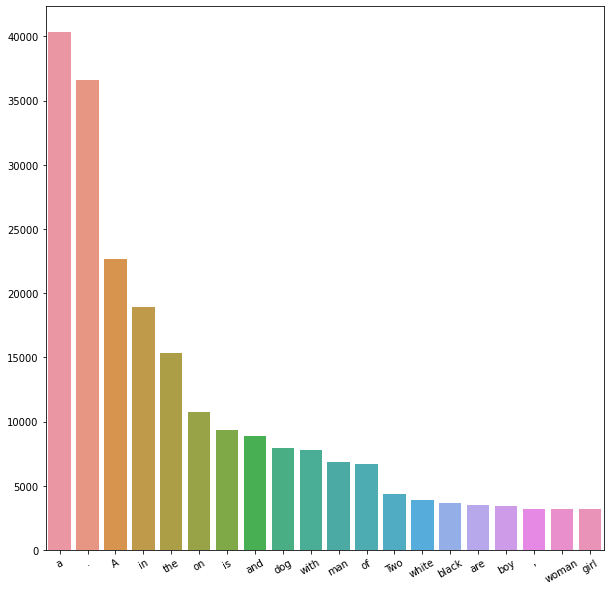

In [ ]:
corpus= ""
for x in descriptions.values():
    for y in x:
        corpus += " "+y

total_words = corpus.split()
vocabulary = set(total_words)
print("The size of vocabulary is {}".format(len(vocabulary)))


freq_dist = FreqDist(total_words)
freq_dist.most_common(5)

total_words = corpus.split()
vocabulary = set(total_words)
print("Vocabulary size is {}".format(len(vocabulary)))

freq_dist = FreqDist(total_words).most_common(20)

all_fdist = pd.Series(dict(freq_dist))

fig, ax = plt.subplots(figsize=(10,10))

all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30);

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Pre-defined punctuation function
re_punc = re.compile('[%s]' % re.escape(string.punctuation))
for key, values in descriptions.items():
  for i in range(len(values)):
    clean_desc = values[i]
# Access each line
    clean_desc = clean_desc.split()
# convert upper case to lower case
    clean_desc = [word.lower() for word in clean_desc]
# remove punctuations
    clean_desc = [re_punc.sub('', w) for w in clean_desc]
# remove single words
    clean_desc = [word for word in clean_desc if len(word)>1]
# remove numbers
    clean_desc = [word for word in clean_desc if word.isalpha()]
# remove stop words
    clean_desc = [word for word in clean_desc if word not in stopwords.words('english')]
    values[i] = ' '.join(clean_desc)

Vocabulary size is 8652


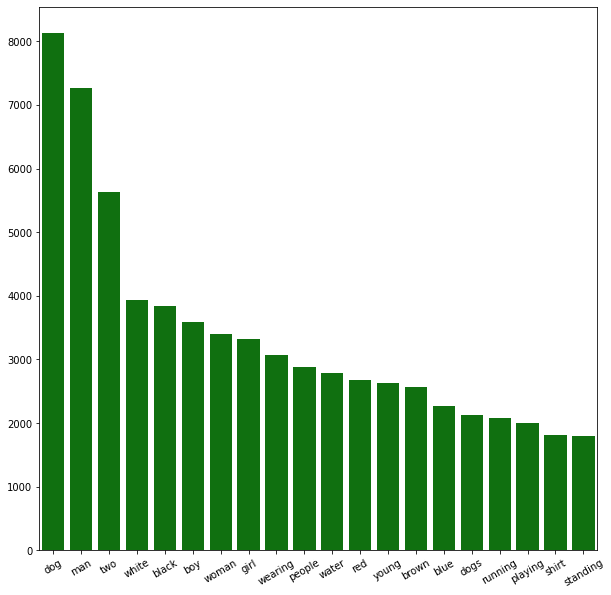

In [ ]:
#Empty string
corpus= ""
for x in descriptions.values():
  #Add every element in values to string
    for y in x:
        corpus += " "+y
#Seperate words
total_words = corpus.split()
#Calculate vocabulary size
vocabulary = set(total_words)
print("Vocabulary size is {}".format(len(vocabulary)))
#Calculate most freqeunt 
freq_dist = FreqDist(total_words).most_common(20)
#Convert them into Data Frame
all_fdist = pd.Series(dict(freq_dist))
#Define figure size
fig, ax = plt.subplots(figsize=(10,10))
#Plot results
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax , color="green")
plt.xticks(rotation=30);

In [ ]:
vocabulary = set()
for i in descriptions.keys():

  for dd in descriptions[i]:
    vocabulary.update(dd.split(" "))

print('The Vocabulary Size: %d' % len(vocabulary))

The Vocabulary Size: 8653


In [ ]:
descriptions["1000268201_693b08cb0e"]

['child pink dress climbing set stairs entry way',
 'girl going wooden building',
 'little girl climbing wooden playhouse',
 'little girl climbing stairs playhouse',
 'little girl pink dress going wooden cabin']

In [ ]:
# save descriptions to file, one per line
def save_clean_desc(descriptions, filename):
	lines = list()
	for key, desc_list in descriptions.items():
		for desc in desc_list:
			lines.append(key + ' ' + desc)
	data = '\n'.join(lines)
	file = open(filename, 'w')
	file.write(data)
	file.close()

# save to file
save_clean_desc(descriptions, 'descriptions.txt')

In [ ]:
import string

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

In [ ]:
from pickle import load

# load a pre-defined list of photo identifiers
def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	# process line by line
	for line in doc.split('\n'):
		# skip empty lines
		if len(line) < 1:
			continue
		# get the image identifier
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)


# load training dataset (6K)
filename = '/content/drive/MyDrive/Kaggle/Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))

Dataset: 6000


In [ ]:

# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
	# load document
	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		# split id from description
		image_id, image_desc = tokens[0], tokens[1:]
		# skip images not in the set
		if image_id in dataset:
			# create list
			if image_id not in descriptions:
				descriptions[image_id] = list()
			# wrap description in tokens
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
			# store
			descriptions[image_id].append(desc)
	return descriptions

In [ ]:
train_descriptions = load_clean_descriptions('/content/descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))

Descriptions: train=6000


In [ ]:
# load photo features
def load_photo_features(filename, dataset):
	# load all features
	all_features = load(open(filename, 'rb'))
	# filter features
	features = {k: all_features[k] for k in dataset}
	return features

# photo features
train_features = load_photo_features('/content/drive/MyDrive/Kaggle/features.pkl', train)
print('Photos: train=%d' % len(train_features))

Photos: train=6000


In [ ]:
from numpy import array
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint


In [ ]:


# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]
	return all_desc

# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
	lines = to_lines(descriptions)
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 7471


In [ ]:
# calculate the length of the description with the most words
def max_length(descriptions):
	lines = to_lines(descriptions)
	return max(len(d.split()) for d in lines)
 
# determine the maximum sequence length
max_length = max_length(train_descriptions)
print('Description Length: %d' % max_length)

Description Length: 22


In [ ]:
# create sequences of images, input sequences and output words for an image
def create_sequences(tokenizer, max_length, desc_list, photo, vocab_size):
	X1, X2, y = list(), list(), list()
	# walk through each description for the image
	for desc in desc_list:
		# encode the sequence
		seq = tokenizer.texts_to_sequences([desc])[0]
		# split one sequence into multiple X,y pairs
		for i in range(1, len(seq)):
			# split into input and output pair
			in_seq, out_seq = seq[:i], seq[i]
			# pad input sequence
			in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
			# encode output sequence
			out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
			# store
			X1.append(photo)
			X2.append(in_seq)
			y.append(out_seq)
	return array(X1), array(X2), array(y)

In [ ]:
# define the captioning model
def define_model(vocab_size, max_length):
	# feature extractor model
	inputs1 = Input(shape=(4096,))
	fe1 = Dropout(0.5)(inputs1)
	fe2 = Dense(256, activation='relu')(fe1)
	# sequence model
	inputs2 = Input(shape=(max_length,))
	se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
	se2 = Dropout(0.5)(se1)
	se3 = LSTM(256)(se2)
	# decoder model
	decoder1 = add([fe2, se3])
	decoder2 = Dense(256, activation='relu')(decoder1)
	outputs = Dense(vocab_size, activation='softmax')(decoder2)
	# tie it together [image, seq] [word]
	model = Model(inputs=[inputs1, inputs2], outputs=outputs)
	# compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam')
	# summarize model
	model.summary()
	plot_model(model, to_file='model.png', show_shapes=True)
	return model

In [ ]:
# data generator, intended to be used in a call to model.fit_generator()
def data_generator(descriptions, photos, tokenizer, max_length, vocab_size):
	# loop for ever over images
	while 1:
		for key, desc_list in descriptions.items():
			# retrieve the photo feature
			photo = photos[key][0]
			in_img, in_seq, out_word = create_sequences(tokenizer, max_length, desc_list, photo, vocab_size)
			yield [in_img, in_seq], out_word


In [ ]:
# define the model
model = define_model(vocab_size, max_length)
# train the model, run epochs manually and save after each epoch
epochs = 10
steps = len(train_descriptions)
for i in range(epochs):
	# create the data generator
	generator = data_generator(train_descriptions, train_features, tokenizer, max_length, vocab_size)
	# fit for one epoch
	model.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1)
	# save model
	model.save('model_epoch' + str(i) + '.h5')

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 22)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 4096)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 22, 256)      1912576     input_3[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 4096)         0           input_2[0][0]                    
____________________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


6000/6000 [==============================] - 1091s 181ms/step - loss: 5.2692


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


6000/6000 [==============================] - 1079s 180ms/step - loss: 3.9192


In [ ]:
from numpy import argmax
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu



In [ ]:

# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None


In [ ]:
# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
	# seed the generation process
	in_text = 'startseq'
	# iterate over the whole length of the sequence
	for i in range(max_length):
		# integer encode input sequence
		sequence = tokenizer.texts_to_sequences([in_text])[0]
		# pad input
		sequence = pad_sequences([sequence], maxlen=max_length)
		# predict next word
		yhat = model.predict([photo,sequence], verbose=0)
		# convert probability to integer
		yhat = argmax(yhat)
		# map integer to word
		word = word_for_id(yhat, tokenizer)
		# stop if we cannot map the word
		if word is None:
			break
		# append as input for generating the next word
		in_text += ' ' + word
		# stop if we predict the end of the sequence
		if word == 'endseq':
			break
	return in_text

In [ ]:
# evaluate the skill of the model
def evaluate_model(model, descriptions, photos, tokenizer, max_length):
	actual, predicted = list(), list()
	# step over the whole set
	for key, desc_list in descriptions.items():
		# generate description
		yhat = generate_desc(model, tokenizer, photos[key], max_length)
		# store actual and predicted
		references = [d.split() for d in desc_list]
		actual.append(references)
		predicted.append(yhat.split())
	# calculate BLEU score
	print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
	print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
	print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
	print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))


Dataset: 1000
Descriptions: test=1000
Photos: test=1000
BLEU-1: 0.442163
BLEU-2: 0.227832
BLEU-3: 0.136591
BLEU-4: 0.050527


In [ ]:

# load test set
filename = '/content/drive/MyDrive/Kaggle/Flickr_8k.testImages.txt'
test = load_set(filename)
print('Dataset: %d' % len(test))
# descriptions
test_descriptions = load_clean_descriptions('/content/descriptions.txt', test)
print('Descriptions: test=%d' % len(test_descriptions))
# photo features
test_features = load_photo_features('/content/drive/MyDrive/Kaggle/features.pkl', test)
print('Photos: test=%d' % len(test_features))

# load the model
filename = '/content/epochs/model_epoch1.h5'
model = load_model(filename)
# evaluate model
evaluate_model(model, test_descriptions, test_features, tokenizer, max_length)


# Generate Caption

In [ ]:
# extract features from each photo in the directory
def extract_features(filename):
	# load the model
	model = VGG16()
	# re-structure the model
	model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
	# load the photo
	image = load_img(filename, target_size=(224, 224))
	# convert the image pixels to a numpy array
	image = img_to_array(image)
	# reshape data for the model
	image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
	# prepare the image for the VGG model
	image = preprocess_input(image)
	# get features
	feature = model.predict(image, verbose=0)
	return feature

# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
	# seed the generation process
	in_text = 'startseq'
	# iterate over the whole length of the sequence
	for i in range(max_length):
		# integer encode input sequence
		sequence = tokenizer.texts_to_sequences([in_text])[0]
		# pad input
		sequence = pad_sequences([sequence], maxlen=max_length)
		# predict next word
		yhat = model.predict([photo,sequence], verbose=0)
		# convert probability to integer
		yhat = argmax(yhat)
		# map integer to word
		word = word_for_id(yhat, tokenizer)
		# stop if we cannot map the word
		if word is None:
			break
		# append as input for generating the next word
		in_text += ' ' + word
		# stop if we predict the end of the sequence
		if word == 'endseq':
			break
	return in_text

# load the tokenizer
#tokenizer = load(open('tokenizer.pkl', 'rb'))
# pre-define the max sequence length (from training)
max_length = max_length
# load the model
model = load_model('/content/epochs/model_epoch2.h5')
# load and prepare the photograph
photo = extract_features('/content/check.png')
# generate description
description = generate_desc(model, tokenizer, photo, max_length)
print(description)

startseq two girls sitting endseq


# References


[1]. https://www.geeksforgeeks.org/image-caption-generator-using-deep-learning-on-flickr8k-dataset/

[2]. https://www.tensorflow.org/tutorials/text/image_captioning

[3]. https://www.analyticsvidhya.com/blog/2020/11/create-your-own-image-caption-generator-using-keras/

[4]. https://machinelearningmastery.com/develop-a-deep-learning-caption-generation-model-in-python/

